<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/Hotel_Reviews_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
- Imports
- Load Dataset

In [3]:
# Imports
import json
import zipfile
import os
from collections import Counter
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
!pip install squarify
import matplotlib
import squarify
!pip install wordcloud

In [4]:
!pip install kaggle
api_token = {"username":"ayushxx7","key":"32c5490ba78a5c6e8eaa81a18380c7dd"}
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/trip-advisor-hotel-reviews

for file in os.listdir():
    if '.zip' in file:
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

kaggle.json
 97% 5.00M/5.14M [00:01<00:00, 2.96MB/s]
100% 5.14M/5.14M [00:01<00:00, 2.96MB/s]


In [5]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Data Preparation
- Cleaning
- Normalization

In [13]:
print(f"Are there any missing values in the Rating column? | {df['Rating'].isnull().values.any()}")
print(f"Are there any missing values in the Reviews column? | {df['Review'].isnull().values.any()}")

Are there any missing values in the Rating column? | False
Are there any missing values in the Reviews column? | False


In [ ]:
df.Rating.unique() # Interger values from 1-5 (No cleaning/normalization reqd)

In [16]:
print(df.Rating.value_counts())

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


## Visualiztion

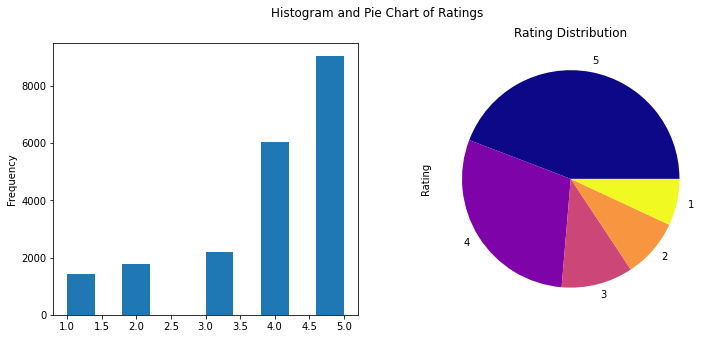

In [42]:
# Ratings
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Histogram and Pie Chart of Ratings')
df['Rating'].plot(kind='hist', ax=ax1)
# df['Rating'].value_counts().plot(kind='bar', ax=ax2)
df.Rating.value_counts().plot(kind='pie', colormap='plasma', title="Rating Distribution", ax=ax2)
# df['Rating'].plot(kind='hist')

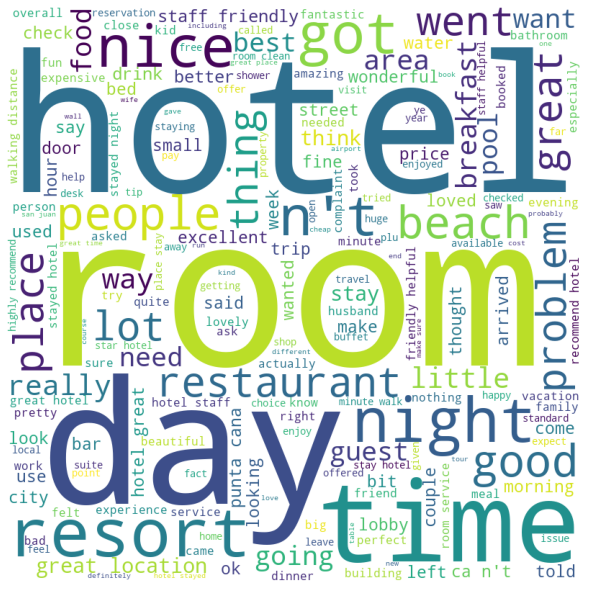

In [45]:
# World Cloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.Review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Questions
- Make a word cloud from the reviews
- What is the average rating of the whole data set
- Perform Sentiment Analysis on Reviews
- Is there a relation between rating and the corresponding review's sentiment (positive => higher rating?)
- How many reviews/ratings are there in the dataset
- Make a predictive model where the input review generates expected rating
- Generate creative visualizations from the dataset

## References
- [Check if Values are missing in dataframe](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)
- [Visualization](https://colab.research.google.com/drive/13yjKquj5C9i-YO8UTsYnf0kpX-MqEcFX#scrollTo=ep8LR4vcFFcN)
- [Visualization](https://colab.research.google.com/drive/1r4ioy4d0A23PvoAOYgcxVNHxQSFAhDaf)
- [Colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [Wordcloud](https://www.geeksforgeeks.org/generating-word-cloud-python/)
